In [29]:
from math import exp
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Spin_classic:
    def __init__(self, const=np.array([0, 0, 0])):
        self.H = const
        
    def __call__(self, x, y):
        return np.cross(y, self.H)

In [3]:
funct = Spin_classic()

In [ ]:
#funct.H = np.array([0, 0, 5])
#funct(np.array([0, 1, 0]), np.array([1, 2, 1]))

In [4]:
def iteration(h, f, x, y):
    k1 = f(x, y)
    k2 = f(x + h / 2, y + h / 2 * k1)
    k3 = f(x + h / 2, y + h / 2 * k2)
    k4 = f(x + h, y + h * k3)
    r = y + (k1 + 2 * k2 + 2 * k3 + k4) * h / 6
    return x + h, r


In [ ]:
#a, b = iteration(0.001, funct, np.array([0, 1, 0]), np.array([1, 1, 1]))
#print(a, b)

In [22]:
def runge(t, h, x0, y0, f):
    a = []
    a.append((x0, y0))
    x, y = x0, y0
    for i in range(int(t / h)):
        x, y = iteration(h, f, x, y)
        a.append([x, y])
    return a

In [23]:
x0 = 0
funct.H = np.array([0, 0, 1])
y0 = np.array([np.sqrt(1 / 2), 0, np.sqrt(1 / 2)])


In [ ]:
#funct(0, y0)

In [32]:
runge(10, 0.01, x0, y0, funct)

[(0, array([0.70710678, 0.        , 0.70710678])),
 [0.01, array([ 0.70707143, -0.00707095,  0.70710678])],
 [0.02, array([ 0.70696536, -0.01414119,  0.70710678])],
 [0.03, array([ 0.70678861, -0.02121002,  0.70710678])],
 [0.04, array([ 0.70654117, -0.02827673,  0.70710678])],
 [0.05, array([ 0.70622308, -0.03534061,  0.70710678])],
 [0.060000000000000005, array([ 0.70583437, -0.04240096,  0.70710678])],
 [0.07, array([ 0.70537508, -0.04945706,  0.70710678])],
 [0.08, array([ 0.70484525, -0.05650822,  0.70710678])],
 [0.09, array([ 0.70424493, -0.06355373,  0.70710678])],
 [0.09999999999999999, array([ 0.70357419, -0.07059289,  0.70710678])],
 [0.10999999999999999, array([ 0.7028331 , -0.07762498,  0.70710678])],
 [0.11999999999999998, array([ 0.70202172, -0.08464931,  0.70710678])],
 [0.12999999999999998, array([ 0.70114014, -0.09166518,  0.70710678])],
 [0.13999999999999999, array([ 0.70018845, -0.09867188,  0.70710678])],
 [0.15, array([ 0.69916673, -0.10566872,  0.70710678])],
 [0

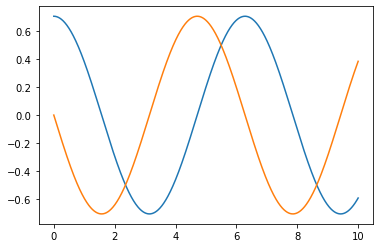

In [34]:
x = [a[i][0] for i in range(len(a))]
y = [a[i][1][0] for i in range(len(a))]
z = [a[i][1][1] for i in range(len(a))]
plt.plot(x, y)
plt.plot(x, z)
plt.show()

In [43]:
class Spin_quantum():
    def __init__(self, const=np.array([0, 0, 0])):
        self.H = const
        
    def __call__(self, x, y):
        Ham = -1j * (self.H[0] * np.array([[0, 1], [1, 0]]) + self.H[1] * np.array([[0, -1j], [1j, 0]]) + self.H[2] * np.array([[1, 0], [0, -1]]))
        return np.dot(Ham, y)


In [44]:
hamilt = Spin_quantum()

In [45]:
x0 = 0
hamilt.H = np.array([0, 0, 1])
y0 = np.sqrt(np.array([0.5, 0.5]))

In [46]:
runge(10, 0.01, x0, y0, hamilt)

[(0, array([0.70710678, 0.70710678])),
 [0.01, array([0.70707143-0.00707095j, 0.70707143+0.00707095j])],
 [0.02, array([0.70696536-0.01414119j, 0.70696536+0.01414119j])],
 [0.03, array([0.70678861-0.02121002j, 0.70678861+0.02121002j])],
 [0.04, array([0.70654117-0.02827673j, 0.70654117+0.02827673j])],
 [0.05, array([0.70622308-0.03534061j, 0.70622308+0.03534061j])],
 [0.060000000000000005,
  array([0.70583437-0.04240096j, 0.70583437+0.04240096j])],
 [0.07, array([0.70537508-0.04945706j, 0.70537508+0.04945706j])],
 [0.08, array([0.70484525-0.05650822j, 0.70484525+0.05650822j])],
 [0.09, array([0.70424493-0.06355373j, 0.70424493+0.06355373j])],
 [0.09999999999999999,
  array([0.70357419-0.07059289j, 0.70357419+0.07059289j])],
 [0.10999999999999999, array([0.7028331-0.07762498j, 0.7028331+0.07762498j])],
 [0.11999999999999998,
  array([0.70202172-0.08464931j, 0.70202172+0.08464931j])],
 [0.12999999999999998,
  array([0.70114014-0.09166518j, 0.70114014+0.09166518j])],
 [0.13999999999999999

In [ ]:
#print(hamilt(0, np.array([0, 1])))

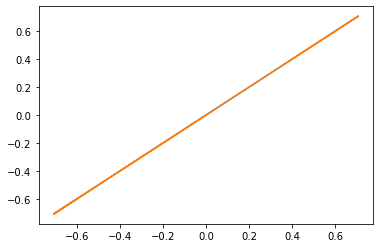